# ***Sentiment Analysis using Deep Learning***

## **Importing Libraries**

In [ ]:
# # pip install nltk
# pip install keras
# pip install tensorflow

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM


## **Loading Dataset**

In [5]:
movie_review = pd.read_csv(r'C:\Users\windo\OneDrive\Documents\VSCode\Day 2\a1_IMDB_Dataset.csv')

In [6]:
movie_review.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### **Checking Missing Values**

In [7]:
movie_review.isnull().values.any()
movie_review['sentiment'].isnull().any()

False

### **Checking Data Skewness**


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='sentiment', ylabel='count'>

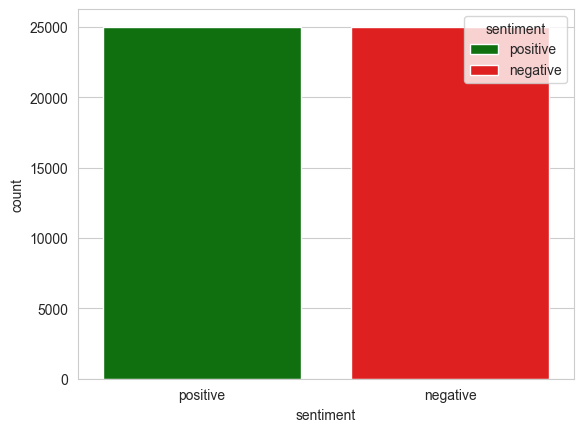

In [9]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data= movie_review, hue = 'sentiment', palette = {'positive': 'green', 'negative': 'red'}, legend = True)

## **Data Preprocessing**


In [10]:
movie_review['review'][0:5]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

### **Defining Function to Remove Tags**


In [11]:
tag_re = re.compile(r'<[^>]*>')
def remove_tags(text):
    return tag_re.sub('', text)



In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\windo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Preprocessing Function**

In [13]:
def preprocess_text(sen):
    sentence = sen.lower()

    # remove html tags
    sentence = remove_tags(sentence)
    # remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', '', sentence)
    # single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", '', sentence)
    # remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    # remove stopwords
    pattern = re.compile(r'\b(' +r'|'.join(stopwords.words('english'))+r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence



### **Applying Preprocessing to Reviews**

In [62]:
# calling preprocessing text function on movie_reviews

X = []
sentences = list(movie_review['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [63]:
X[7]

'thisshowwasanamazingfreshinnovativeideaintheswhenitfirstairedthefirstoryearswerebrilliantbutthingsdroppedoffafterthatbytheshowwasnotreallyfunnyanymoreanditscontinueditsdeclinefurthertothecompletewasteoftimeitistodayitstrulydisgracefulhowfarthisshowhasfallenthewritingispainfullybadtheperformancesarealmostasbadifnotforthemildlyentertainingrespiteoftheguesthoststhisshowprobablywouldntstillbeontheairifinditsohardtobelievethatthesamecreatorthathandselectedtheoriginalcastalsochosethebandofhacksthatfollowedhowcanonerecognizesuchbrillianceandthenseefittoreplaceitwithsuchmediocrityifeltimustgivestarsoutofrespectfortheoriginalcastthatmadethisshowsuchahugesuccessasitisnowtheshowisjustawfulicantbelieveitsstillontheair'

## **Converting Sentiments to 1 and 0**

In [16]:
# converting sentiment labels to 0 and 1
y = movie_review['sentiment']
y = np.array(list(map(lambda x: 1 if x=='positive' else 0, y)))

## **Training the Data**

In [18]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state= 42)

## **Preparing Embedding Layer**

In [21]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [22]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

39742

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [26]:
maclen = 100

X_train = pad_sequences(X_train, padding = 'post', maxlen = maclen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maclen)


In [27]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding = 'utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype = 'float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [28]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [29]:
embedding_matrix.shape

(39742, 100)

# **Model Training with Simple Neural Network**

## **Simple Neural Network**


### **Neural network architecture**

In [31]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maclen, trainable = False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation = 'sigmoid'))

### **Model Compiling**


In [34]:
import tensorflow as tf

In [36]:
snn = tf.keras.models.Sequential()
snn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  # Correct way


In [ ]:
# Define the model
snn_model = tf.keras.models.Sequential()

# Add layers to the model 
snn_model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
snn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


### **Model training**

In [39]:
snn_model_history = snn_model.fit(X_train, Y_train, batch_size = 128, epochs=6, verbose = 1, validation_split =0.2)

Epoch 1/6
250/250 [==============================] - 1s 2ms/step - loss: 7.9795 - acc: 0.5003 - val_loss: 8.8137 - val_acc: 0.5001
Epoch 2/6
250/250 [==============================] - 0s 1ms/step - loss: 5.9969 - acc: 0.5007 - val_loss: 11.6194 - val_acc: 0.5000
Epoch 3/6
250/250 [==============================] - 0s 1ms/step - loss: 7.1088 - acc: 0.5050 - val_loss: 15.9686 - val_acc: 0.5000
Epoch 4/6
250/250 [==============================] - 0s 1ms/step - loss: 6.5462 - acc: 0.5043 - val_loss: 17.6165 - val_acc: 0.5000
Epoch 5/6
250/250 [==============================] - 0s 2ms/step - loss: 8.1618 - acc: 0.5016 - val_loss: 3.0152 - val_acc: 0.5000
Epoch 6/6
250/250 [==============================] - 0s 1ms/step - loss: 5.4732 - acc: 0.5026 - val_loss: 6.8301 - val_acc: 0.5014


### **Predictions on the test set**

In [40]:
score = snn_model.evaluate(X_test, Y_test, verbose = 1)

313/313 [==============================] - 0s 770us/step - loss: 0.7539 - acc: 0.4896


### **Model performance**

In [41]:
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.7538541555404663
Test Accuracy: 0.4896000027656555


### **Model performance charts**

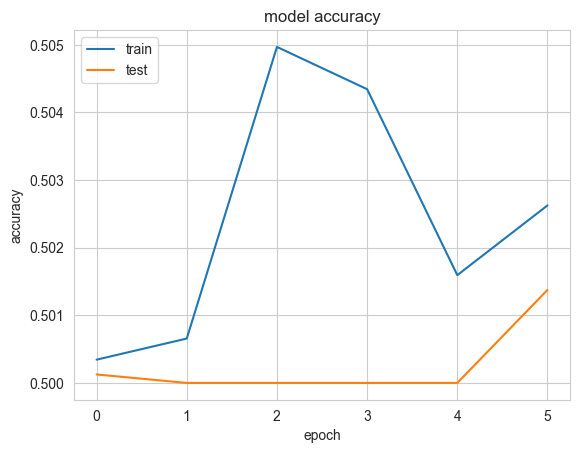

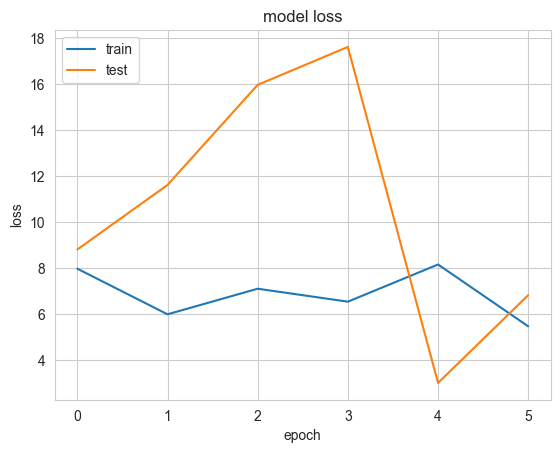

In [42]:
import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **Convolutional Neural Network**

In [43]:
from keras.layers import Conv1D

### **Neural Network Architecture**

In [ ]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maclen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

### **Model Compiling**

In [ ]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          3974200   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4038457 (15.41 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 3974200 (15.16 MB)
_________________________________________________________________
None


### **Model Training**

In [ ]:
cnn_model_history = cnn_model.fit(X_train, Y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 9s 36ms/step - loss: 0.6932 - acc: 0.4942 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/6
250/250 [==============================] - 9s 34ms/step - loss: 0.6932 - acc: 0.4997 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/6
250/250 [==============================] - 9s 37ms/step - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/6
250/250 [==============================] - 11s 42ms/step - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/6
250/250 [==============================] - 15s 61ms/step - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/6
250/250 [==============================] - 15s 59ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000


### **Predictions on the Test Set**

In [ ]:
score = cnn_model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.6932 - acc: 0.4961


### **Model Performance**

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6931646466255188
Test Accuracy: 0.4961000084877014


### **Model Performance Charts**

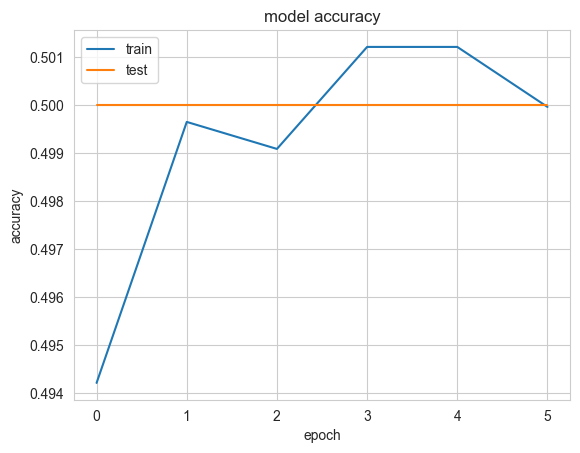

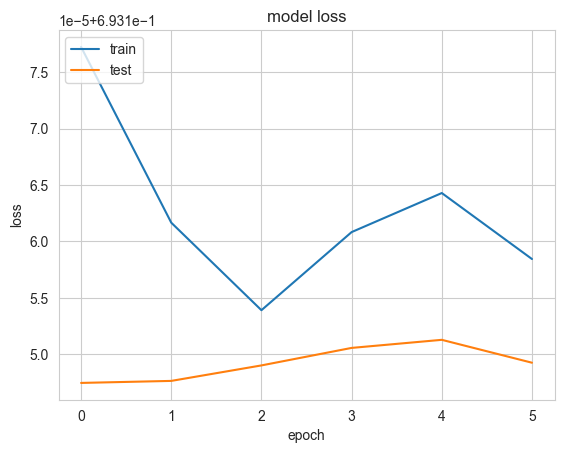

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## **Recurrent Neural Network (LSTM)**

In [51]:
from keras.layers import LSTM

### **Neural Network Architecture**

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maclen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

### **Model Compiling**

In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          3974200   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4091577 (15.61 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 3974200 (15.16 MB)
_________________________________________________________________
None


### **Model Training**

In [ ]:
lstm_model_history = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 42s 161ms/step - loss: 0.6932 - acc: 0.5025 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/6
250/250 [==============================] - 42s 170ms/step - loss: 0.6932 - acc: 0.5026 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/6
250/250 [==============================] - 43s 172ms/step - loss: 0.6932 - acc: 0.4952 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/6
250/250 [==============================] - 45s 178ms/step - loss: 0.6931 - acc: 0.5044 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/6
250/250 [==============================] - 44s 176ms/step - loss: 0.6932 - acc: 0.4963 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/6
250/250 [==============================] - 45s 181ms/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6932 - val_acc: 0.5000


### **Predictions on the Test Set**

In [ ]:
score = lstm_model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 6s 20ms/step - loss: 0.6931 - acc: 0.5039


### **Model Performance**

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6931256055831909
Test Accuracy: 0.5038999915122986


## **Model Performance Charts**

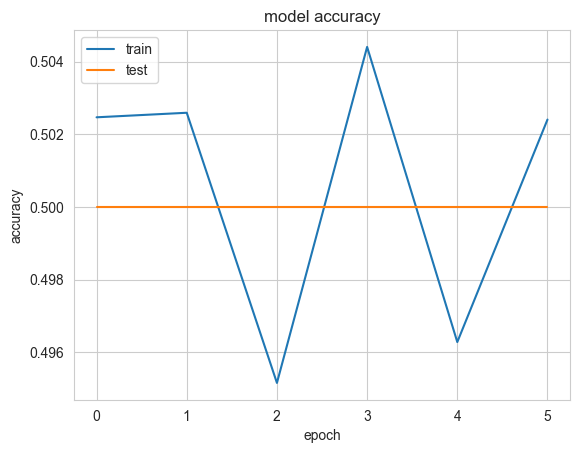

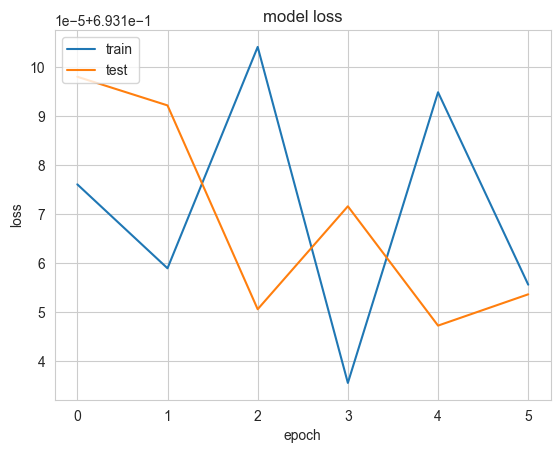

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **Saving the Model**

In [ ]:
lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

c:\Users\windo\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
